In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Базовый KNN 

In [5]:
class KNN:
    def p(self, u, x):
        # Функция расстояния
        return np.sqrt(((u - x)**2).sum())
    def predict(self, X, k=3):
        # Матрица расстояний
        p = {}
        index = 0
        for obj in X.values:
            p_obj = []
            for edu_obj in self.X.values:
                p_obj.append(self.p(obj, edu_obj))
            p[f'{index}'] = p_obj
            index += 1
        p = pd.DataFrame(p)
        ans = []
        # По матрица находим класс точек наиболее близких к целевым
        for name_col in p.columns:
            # индексы k с минимальным расстояним 
            idx = np.argpartition(p[name_col], k)
            # номера ближайших точек
            k_near = list(p[name_col][idx[:k]].index)
            class_y = []
            # каждой ближайшей точке находим соответствующий класс
            for obj in k_near:
                class_y.append(self.y.iloc[obj].values[0])
            # находим наиболее встречающийся класс 
            vals, count = np.unique(class_y, return_counts=True)
            ans.append(vals[np.argmax(count)])
        return pd.DataFrame(ans)
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.data = pd.concat([X, y], axis=1)
        return self
    def accuracy_score(self, y, y_):
        return (y_ == y).sum()/y.shape[0]
    def plot(self, X, y):
        # Скаттер обучающей выборки
        plt.scatter(self.X[0], self.X[1], c=self.y, marker='o')
        # Скаттер целевых точек 
        plt.scatter(X[0], X[1], c=y, marker='x')


In [6]:
from sklearn.datasets import make_classification

X, y = make_classification(random_state=10,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=2)
y[y == 0] = -1  
X_t, X_r = pd.DataFrame(X).head(50), pd.DataFrame(X).tail(50) 
y_t, y_r = pd.DataFrame(y).head(50), pd.DataFrame(y).tail(50).reset_index(drop=True)

In [7]:
model = KNN().fit(X_t, y_t)
ans = model.predict(X_r, k=2)

In [8]:
model.accuracy_score(y_r, ans)

0    0.96
dtype: float64

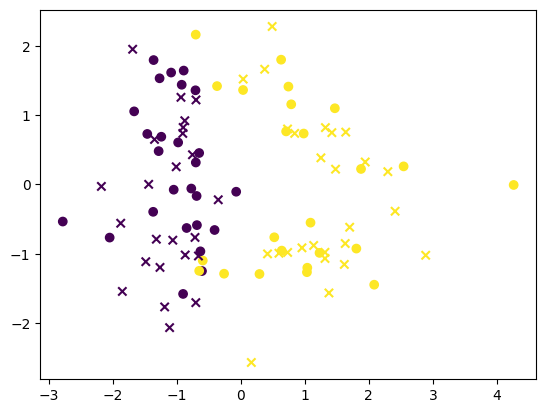

In [9]:
model.plot(X_r, ans)

# Взвешенный KNN (Вопрос, пока не уверен в корректности работы)

In [10]:
class WeightedKNN:
    def p(self, u, x):
        # Функция расстояния
        return np.sqrt(((u - x)**2).sum())
    def kernel(self, x):
        # Ядерная функция (гауссово ядро)
        return 1/np.sqrt(2*np.pi) * np.e**(-2*x**2)
    def predict(self, X, k=3, h=0.1):
        # Матрица расстояний
        p = {}
        index = 0
        for obj in X.values:
            p_obj = []
            for edu_obj in self.X.values:
                p_obj.append(self.p(obj, edu_obj))
            p[f'{index}'] = p_obj
            index += 1
        # матрица весов
        kernels = self.kernel(pd.DataFrame(p)/h)
        ans = []
        # По матрице весов находим класс точек с наибольшим весом
        for name_col in kernels.columns:
            # номера объектов с наибольшим весом
            k_near = list(kernels[name_col].sort_values()[kernels[name_col].shape[0] - k:].index)
            # каждой точке с наибольшим весом находим соответствующий класс
            class_y = []
            for obj in k_near:
                class_y.append(self.y.iloc[obj].values[0])
            # находим класс с наибольшим весом  
            y_w = pd.DataFrame({'Y':class_y, 'w':kernels[name_col][k_near]})
            ans.append(y_w.groupby('Y').sum('w').idxmax().values[0])
        return pd.DataFrame(ans)
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.data = pd.concat([X, y], axis=1)
        return self
    def accuracy_score(self, y, y_):
        return (y_ == y).sum()/y.shape[0]
    def plot(self, X, y):
        # Скаттер обучающей выборки
        plt.scatter(self.X[0], self.X[1], c=self.y, marker='o')
        # Скаттер целевых точек 
        plt.scatter(X[0], X[1], c=y, marker='x')


In [11]:
from sklearn.datasets import make_classification

X, y = make_classification(random_state=10,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=2)
y[y == 0] = -1  
X_t, X_r = pd.DataFrame(X).head(50), pd.DataFrame(X).tail(50) 
y_t, y_r = pd.DataFrame(y).head(50), pd.DataFrame(y).tail(50).reset_index(drop=True)

In [12]:
model = WeightedKNN().fit(X_t, y_t)
ans = model.predict(X_r, k=2, h=3)

In [13]:
model.accuracy_score(y_r, ans)

0    0.96
dtype: float64

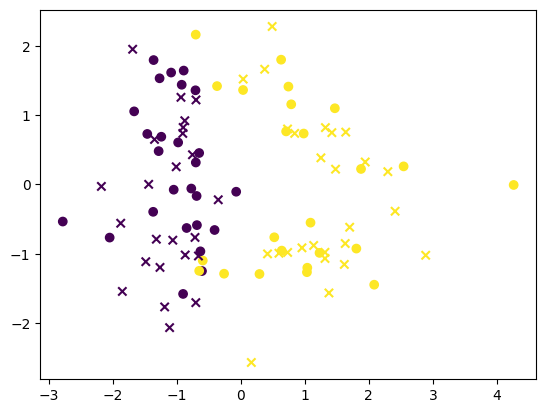

In [14]:
model.plot(X_r, ans)

# Регрессиия KNN

In [15]:
class RegressionWeightedKNN:
    def p(self, u, x):
        # Функция расстояния
        return np.sqrt(((u - x)**2).sum())
    def kernel(self, x):
        # Ядерная функция (гауссово ядро)
        return 1/np.sqrt(2*np.pi) * np.e**(-2*x**2)

    def predict(self, X, k=3, h=0.1):
        # Матрица расстояний
        p = {}
        index = 0
        for obj in X.values:
            p_obj = []
            for edu_obj in self.X.values:
                p_obj.append(self.p(obj, edu_obj))
            p[f'{index}'] = p_obj
            index += 1
        # матрица весов
        kernels = self.kernel(pd.DataFrame(p)/h)
        ans = []
        # По матрице весов находим класс точек с наибольшим весом
        for name_col in kernels.columns:
            # номера объектов с наибольшим весом
            k_near = list(kernels[name_col].sort_values()[kernels[name_col].shape[0] - k:].index)
            # каждой точке с наибольшим весом находим соответствующий класс
            val_y = []
            for obj in k_near:
                val_y.append(self.y.iloc[obj].values[0])
            # находим класс с наибольшим весом  
            ans.append(np.mean(val_y))
        return pd.DataFrame(ans)
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.data = pd.concat([X, y], axis=1)
        return self
    def score(self, y, y_):
        return 1 - ((y - y_)**2).sum()/((y - y.mean())**2).sum()
    def plot(self, X, y, k, h):
        # Предсказания на тестовой выборке и создание плотной сетки для отображения модели
        X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_fit = self.predict(pd.DataFrame(X_fit), k=k, h=h)
        # Визуализация
        plt.figure(figsize=(10, 6))
        plt.scatter(self.X, self.y, color='blue', label='Training Data', s=50)
        plt.scatter(X, y, color='green', label='Test Data', s=50)
        plt.plot(X_fit, y_fit, color='red', label=f'KNN Prediction (k={k})', linewidth=2)
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f'K-Neighbors Regression with k={k}')
        plt.legend()
        plt.show()


In [16]:
from sklearn.datasets import make_regression
N = 100
X, y = make_regression(n_samples=N, n_features=1, noise=30, random_state=42)

In [17]:
np.random.seed(42)
X = 5 * np.random.rand(100, 1) # случайные точки от 0 до 5
y = np.sin(X).ravel() + np.random.normal(0, 0.35, X.shape[0])  # добавляем шум к sin функции
X, y = pd.DataFrame(X), pd.DataFrame(y)

In [18]:
model = RegressionWeightedKNN().fit(X, y)
ans = model.predict(X, k=10, h=0.1)
model.score(y, ans)

0    0.840548
dtype: float64

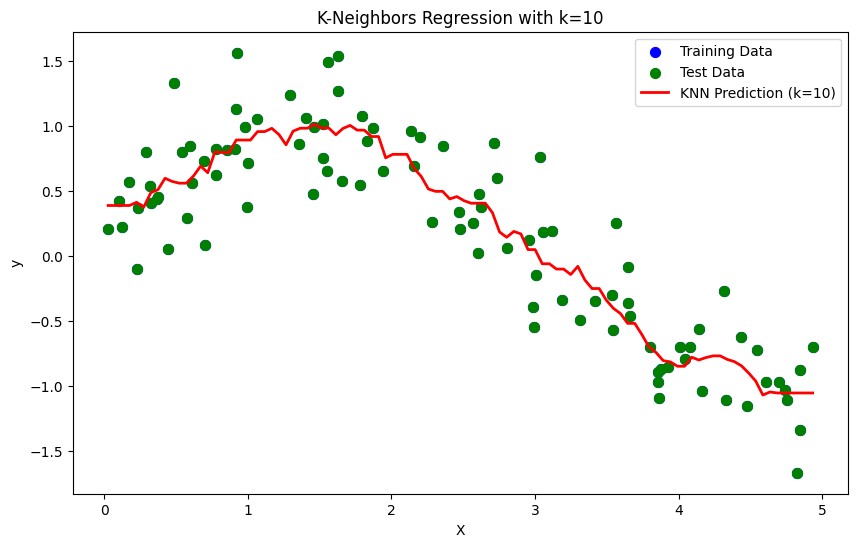

In [19]:
model.plot(X, y, 10, 0.1)